In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# generate some artificial linearly separable data
group1 = list(zip(np.random.uniform(5, 10, 20), np.random.uniform(0, 5, 20), np.ones(20, dtype=int)))
group2 = list(zip(np.random.uniform(0, 5, 20), np.random.uniform(0, 5, 20), np.zeros(20, dtype=int)))

fulldset = group1 + group2
df = pd.DataFrame(data = fulldset, columns = ['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,7.654066,1.863445,1
1,8.959440,0.119603,1
2,7.325793,0.501775,1
3,6.781798,1.980432,1
4,9.904886,1.378721,1


<AxesSubplot:xlabel='x1', ylabel='x2'>

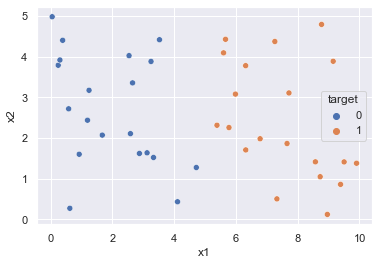

In [18]:
sns.scatterplot(x = df.x1, y = df.x2, hue = df.target)

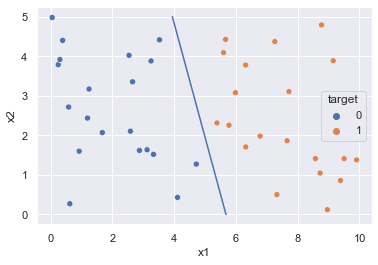

In [46]:
# lets fit a svm model
from sklearn.svm import LinearSVC

x = df[['x1', 'x2']]
y = df.target

# use default params (c = 1, loss = hinge, penalty = l2)
svc = LinearSVC(random_state = 42, C = 100, max_iter = 10000)

svc.fit(x, y)

svc.coef_ # 0.48x1 + 0.04x2 = -inter (boundary) --> x1 = (-inter - 0.04x2)/0.48

theta1 = svc.coef_[0][0]
theta2 = svc.coef_[0][1]
inter = svc.intercept_

val2 = np.arange(0,6,1)
val1 = -((inter + (theta2*val2))/theta1)

sns.scatterplot(x = df.x1, y = df.x2, hue = df.target)
plt.plot(val1, val2)

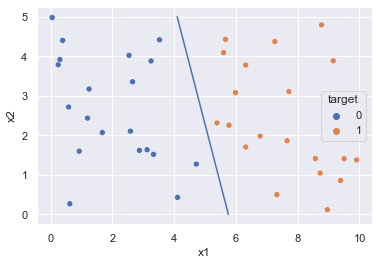

In [48]:
# do same with svc and svclassifier

from sklearn.svm import SVC

svc2 = SVC(random_state = 42, max_iter = 5000, kernel = 'linear', C = 1)
svc2.fit(x, y)

theta12 = svc2.coef_[0][0]
theta22 = svc2.coef_[0][1]
inter2 = svc2.intercept_

val22 = np.arange(0,6,1)
val12 = -((inter2 + (theta22*val22))/theta12)

sns.scatterplot(x = df.x1, y = df.x2, hue = df.target)
plt.plot(val12, val22)